## MOBILE PRICE CLASSIFICATION 

In this data:
* id:ID
* battery_power:Total energy a battery can store in one time measured in mAh
* blue:Has bluetooth or not
* clock_speed:speed at which microprocessor executes instructions
* dual_sim:Has dual sim support or not
* fc:Front Camera mega pixels
* four_g:Has 4G or not
* int_memory:Internal Memory in Gigabytes
* m_dep:Mobile Depth in cm
* mobile_wt:Weight of mobile phone
* n_cores:Number of cores of processor
* pc:Primary Camera mega pixels
* px_height:Pixel Resolution Height
* px_width:Pixel Resolution Width
* ram:Random Access Memory in Megabytes
* sc_h:Screen Height of mobile in cm
* sc_w:Screen Width of mobile in cm
* talk_time:longest time that a single battery charge will last when you are
* three_g:Has 3G or not
* wifi:Has wifi or not

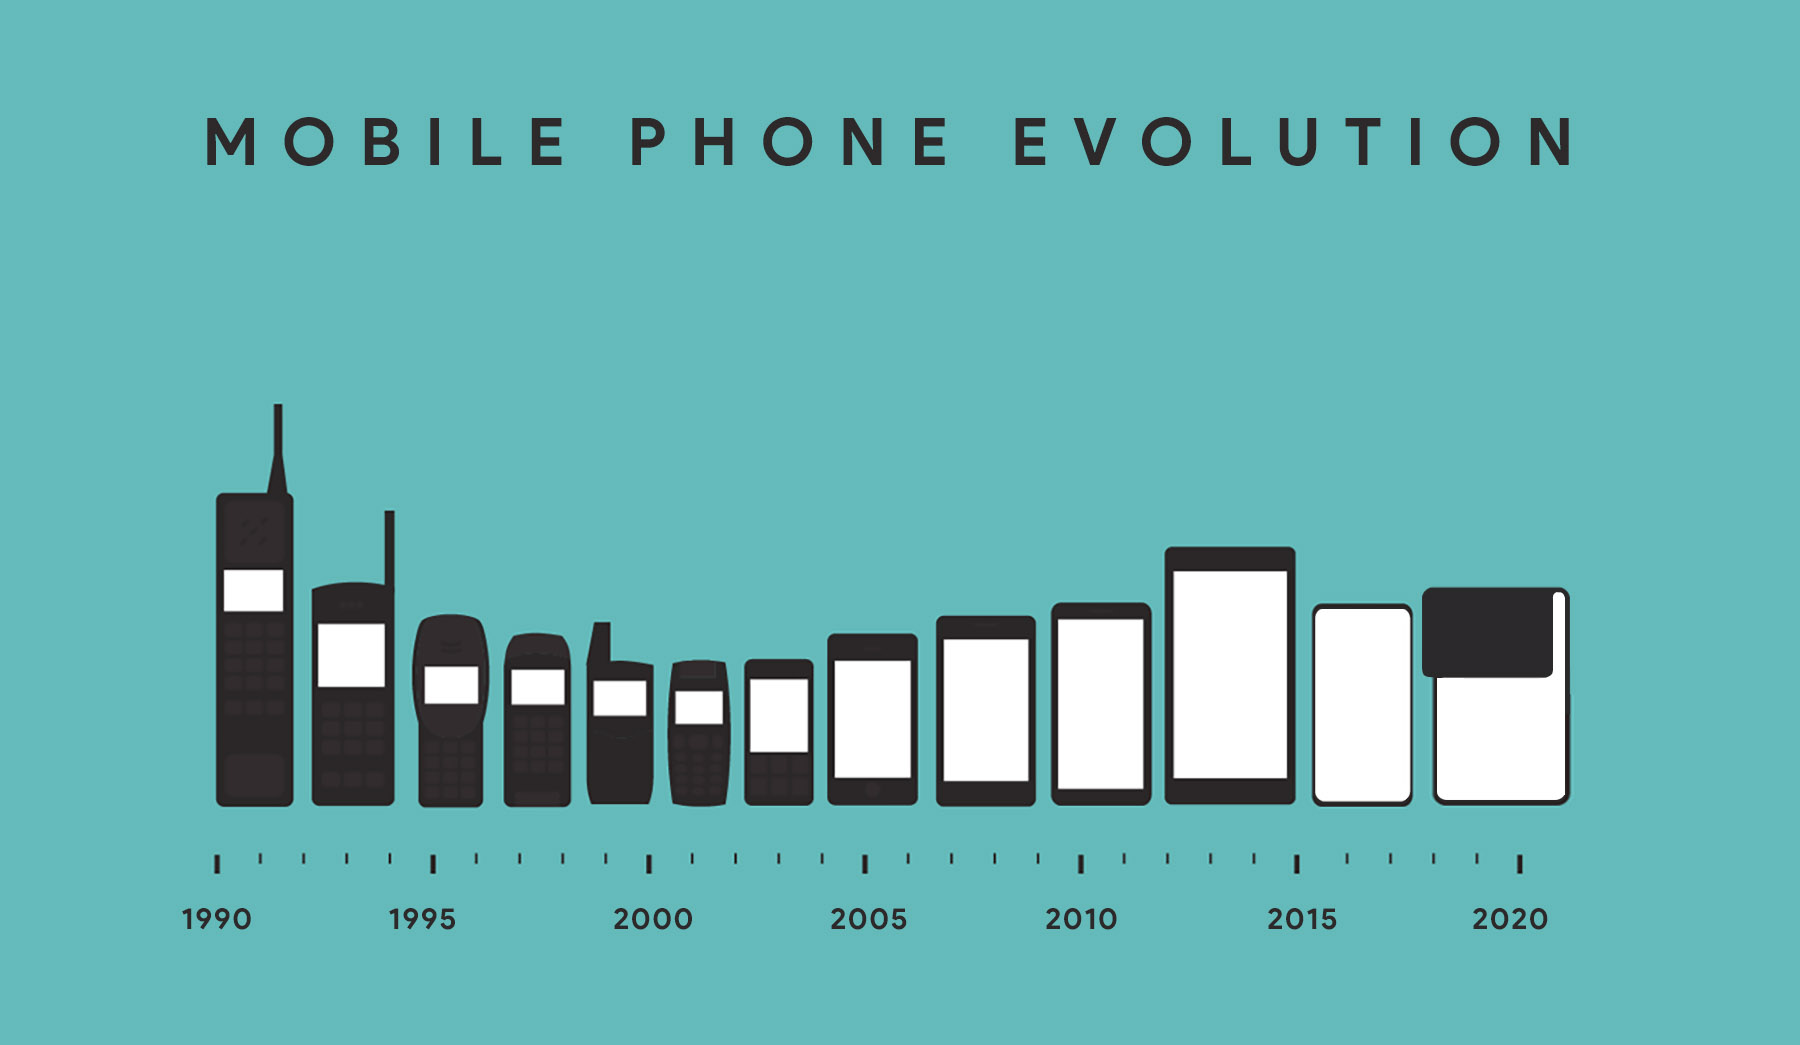

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline
import io
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df.head()

In [ ]:
print(df.columns)
print(df.shape)

In [ ]:
df.info()

There are no null values in the dataset.

# Data Vizualization
## Correlation

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
g = sns.heatmap(df[top_corr_features].corr(),annot = True)

## RAM (ram)
Random Access Memory

In [ ]:
sns.boxplot(df['price_range'],df['ram']);
plt.show()
sns.swarmplot(df['price_range'],df['ram']);

In [ ]:
sns.barplot(df['price_range'],df['ram']);

RAM is strongly correlated with price_range which can be visualized in the above plots. The price range increases as the RAM increases. 

## Battery Power (battery_power)
Total energy a battery can store in mAh

In [ ]:
sns.violinplot(df['price_range'],df['battery_power']);

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(df['battery_power'],bins=50)
plt.show()

## Pixel Height (px_height) 
Pixel Resolution Height

In [ ]:
sns.swarmplot(df['price_range'],df['px_height']);
plt.show()
sns.boxplot(df['price_range'],df['px_height']);

## Pixel Width (px_width)
Pixel Resolution Width

In [ ]:
sns.swarmplot(df['price_range'],df['px_width']);
plt.show()
sns.boxplot(df['price_range'],df['px_width']);

## Front Camera (fc)
Front Camera mega pixels

In [ ]:
sns.pointplot(df['price_range'],df['fc'])

## Primary Camera (pc)
Primary Camera mega pixels

In [ ]:
sns.pointplot(df['price_range'],df['pc']);

In [ ]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MP');

## 4G and 3G Supported (four_g, three_g)
4G and 3G compatibility

In [ ]:
labels_4g = ['4G-Supported','Not Supported']
values_4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_4g, labels=labels_4g, shadow=True, startangle=90, autopct='%1.1f%%');

In [ ]:
sns.countplot(df['price_range'],hue=df['four_g'])

Mobile phones belonging to price range 3 have more phones compitable to 4G. However, it is very insignificant with the given dataset.

In [ ]:
labels_4g = ['3G-Supported','Not Supported']
values_4g = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_4g, labels=labels_4g, shadow=True, startangle=90, autopct='%1.1f%%');

In [ ]:
sns.countplot(df['price_range'],hue=df['three_g'])

Most of the phones are 3G compatible in all price ranges.

## Internal Memory (int_memory)
Internal Memory in Gigabytes

In [ ]:
sns.boxplot(df['price_range'],df['int_memory']);

Internal memory does not play a significant role in categorizing price range.

## Screen Height and Screen Width (sc_h, sc_w)
Screen height and screen width in cm

In [ ]:
sns.boxenplot(df['price_range'],df['sc_h']);
plt.show()
sns.boxenplot(df['price_range'],df['sc_w']);

It can be noted that phones belonging to price range 3 have more screen height and width. However, the converse need not be true.

## Preprocessing

In [ ]:
df = df[~((df['ram'] < 1410) & (df['price_range'] == 2))] #dropping phones less belonging to price range 2 and ram less than 1410 mb. 
df = df[~((df['ram'] > 1650) & (df['price_range'] == 0))] #dropping phones less belonging to price range 0 and ram greater than 1650 mb. 
df = df.drop(columns=(['m_dep'])) #mobile depth doesn't have a role in categorizing price range

df = pd.get_dummies(df, columns = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']) 
# Creating a dummy variable for the categorical features 

standardScaler = StandardScaler() #scaling down the numeric/continous variables
columns_to_scale = ['battery_power','ram','px_height','px_width','mobile_wt','int_memory','sc_h','sc_w','talk_time','fc','n_cores','pc']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])
df.head()

In [ ]:
X=df.drop('price_range',axis=1) #defining X 
y=df['price_range'] #defining y

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Model Training: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=1, 
                              max_iter=1000, 
                              penalty='l1',
                              solver='saga')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid1 = [
    {'penalty' : ['l1','l2','elasticnet','none'],
     'C' : np.logspace(-4,4,20),
     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'max_iter': [100,1000,2500,5000]
    }
]

rf_Grid1 = GridSearchCV(estimator = logmodel, param_grid = param_grid1, cv = 3, verbose = True, n_jobs = -1)
rf_Grid1.fit(X_train,y_train)

In [ ]:
rf_Grid1.best_estimator_

In [ ]:
logmodel.fit(X_train,y_train)
y_predict = logmodel.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
pd.crosstab(y_test,y_predict)

## Predicting for the test data

In [ ]:
url1 = '/kaggle/input/mobile-price-classification/test.csv'
test_df = pd.read_csv(url1) #importing the test file 
test_df.head()

In [ ]:
test_df1 = test_df.drop('id', axis=1) #id column is removed as we need to predict for this dataset
test_df1 = test_df1.drop(columns=(['m_dep'])) #columns which are not present in train dataset are removed
test_df1 = pd.get_dummies(test_df1, columns = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']) #dummy values for the columns(same columns as train dataset)

standardScaler = StandardScaler() #standardscaling the columns(same columns as train dataset)
columns_to_scale = ['battery_power','ram','px_height','px_width','mobile_wt','int_memory','sc_h','sc_w','talk_time','fc','n_cores','pc']
test_df1[columns_to_scale] = standardScaler.fit_transform(test_df1[columns_to_scale]) 

test_df1.head(1)

In [ ]:
Predicted_price = logmodel.predict(test_df1)
Predicted_price

In [ ]:
test_df['predicted_price'] = Predicted_price #adding predicted column to the test dataset
test_df.head()

# ----------------------------------------------**----------------------------------------------